In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import LSTM
from keras.layers.wrappers import Bidirectional
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

np.random.seed(0)

Using TensorFlow backend.


In [2]:
'''
データの生成
'''
mnist = datasets.fetch_mldata('MNIST original', data_home='.')


In [3]:

n = len(mnist.data)
N = 30000  # MNISTの一部を使う
N_train = 20000
N_validation = 4000
indices = np.random.permutation(range(n))[:N]  # ランダムにN枚を選択


In [4]:
X = mnist.data[indices]
X = X / 255.0
X = X - X.mean(axis=1).reshape(len(X), 1)
X = X.reshape(len(X), 28, 28)  # 時系列データに変換
y = mnist.target[indices]
Y = np.eye(10)[y.astype(int)]  # 1-of-K 表現に変換

X_train, X_test, Y_train, Y_test = \
    train_test_split(X, Y, train_size=N_train)

X_train, X_validation, Y_train, Y_validation = \
    train_test_split(X_train, Y_train, test_size=N_validation)


In [5]:
'''
モデル設定
'''
n_in = 28
n_time = 28
n_hidden = 128
n_out = 10


def weight_variable(shape, name=None):
    return np.random.normal(scale=.01, size=shape)


early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

model = Sequential()
model.add(Bidirectional(LSTM(n_hidden),
                        input_shape=(n_time, n_in)))
model.add(Dense(n_out, kernel_initializer=weight_variable))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999),
              metrics=['accuracy'])

In [8]:
'''
モデル学習
'''
epochs = 10
batch_size = 1000

hist = model.fit(X_train, Y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 validation_data=(X_validation, Y_validation),
                 callbacks=[early_stopping])

Train on 16000 samples, validate on 4000 samples
Epoch 1/10
16000/16000 [==============================] - 49s - loss: 1.1893 - acc: 0.6087 - val_loss: 1.0155 - val_acc: 0.6547

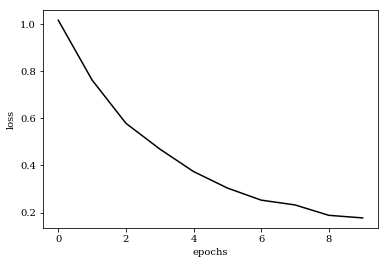

In [11]:
'''
学習の進み具合を可視化
'''
acc = hist.history['val_acc']
loss = hist.history['val_loss']

plt.rc('font', family='serif')
fig = plt.figure()
plt.plot(range(len(loss)), loss,
         label='loss', color='black')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()


In [12]:
'''
予測精度の評価
'''
loss_and_metrics = model.evaluate(X_test, Y_test)
print(loss_and_metrics)


 9984/10000 [============================>.] - ETA: 0s 